In [1]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
pip install scikit-plot

In [3]:
pip install seaborn

In [4]:
pip install matplotlib

In [5]:

import math
import numpy as np
import pandas as pd

import scikitplot
import seaborn as sns
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [6]:
df = pd.read_csv('/content/drive/MyDrive/facial_dataset/fer2013.csv')
print(df.shape)
df.head()

(35887, 3)


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


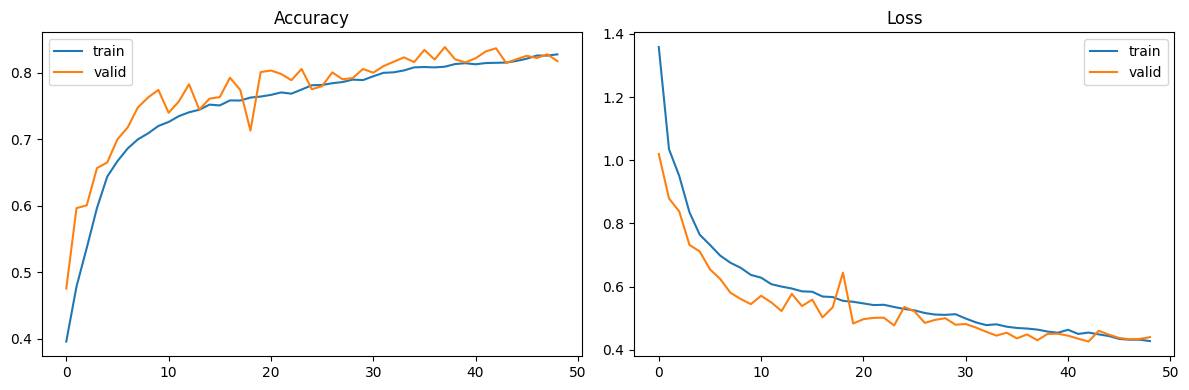

In [32]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.epoch, history.history['accuracy'], label='train')
plt.plot(history.epoch, history.history['val_accuracy'], label='valid')
plt.title('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.epoch, history.history['loss'], label='train')
plt.plot(history.epoch, history.history['val_loss'], label='valid')
plt.title('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('epoch_history_dcnn.png')
plt.show()


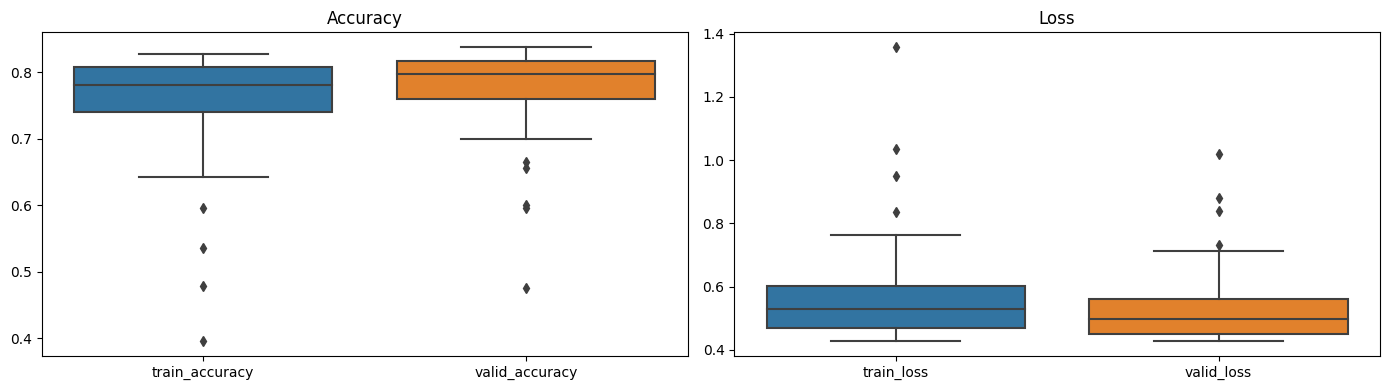

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have the 'history' object

# Create DataFrames for accuracy and loss
df_accu = pd.DataFrame({'train_accuracy': history.history['accuracy'], 'valid_accuracy': history.history['val_accuracy']})
df_loss = pd.DataFrame({'train_loss': history.history['loss'], 'valid_loss': history.history['val_loss']})

# Create box plots using seaborn
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

sns.boxplot(data=df_accu, ax=axes[0])
sns.boxplot(data=df_loss, ax=axes[1])

axes[0].set_title('Accuracy')
axes[1].set_title('Loss')

plt.tight_layout()
plt.savefig('performance_dist.png')
plt.show()


In [34]:
history

67/67 [==============================] - 1s 8ms/step
total wrong validation predictions: 344




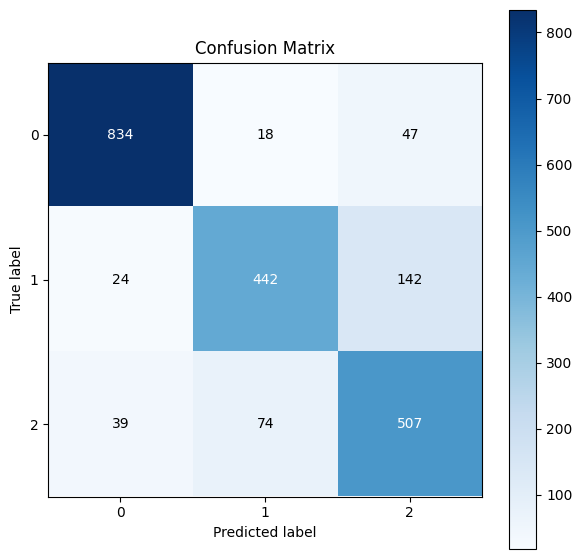

In [35]:
yhat_valid_probs = model.predict(X_valid)
yhat_valid = np.argmax(yhat_valid_probs, axis=1)

# Now you can proceed with the rest of your code, e.g., plotting the confusion matrix
scikitplot.metrics.plot_confusion_matrix(np.argmax(y_valid, axis=1), yhat_valid, figsize=(7, 7))
plt.savefig("confusion_matrix_dcnn.png")

print(f'total wrong validation predictions: {np.sum(np.argmax(y_valid, axis=1) != yhat_valid)}\n\n')


In [36]:
from sklearn.metrics import classification_report

y_true = np.argmax(y_valid, axis=1)
print(classification_report(y_true, yhat_valid))


              precision    recall  f1-score   support

           0       0.93      0.93      0.93       899
           1       0.83      0.73      0.77       608
           2       0.73      0.82      0.77       620

    accuracy                           0.84      2127
   macro avg       0.83      0.82      0.82      2127
weighted avg       0.84      0.84      0.84      2127



In [37]:
mapper = {
    0: "happy",
    1: "sad",
    2: "neutral",
}

1/1 [==============================] - 0s 20ms/step


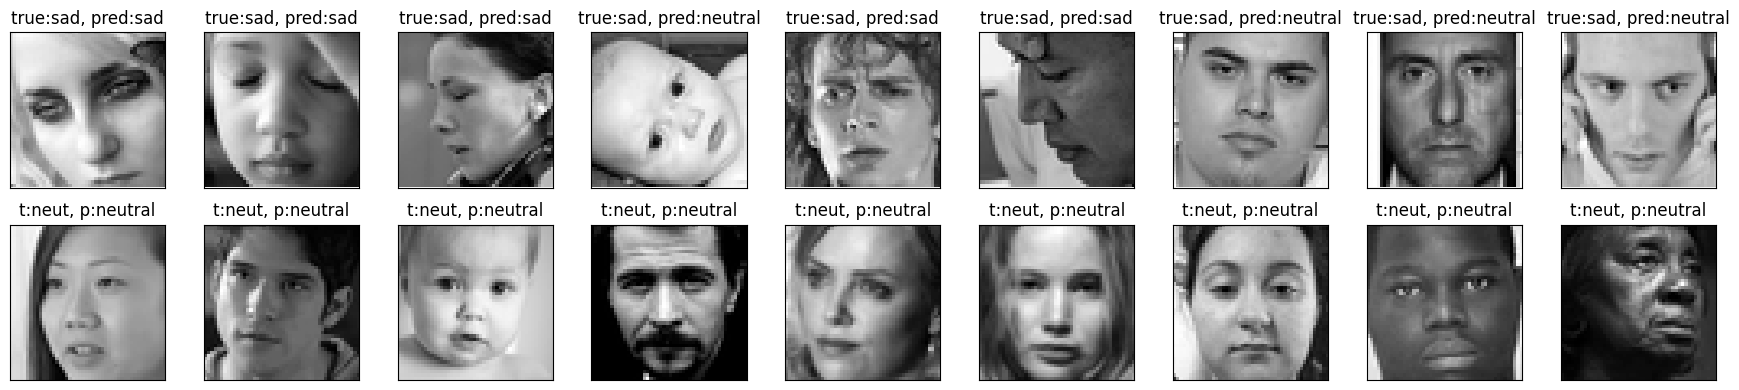

In [38]:
np.random.seed(2)
random_sad_imgs = np.random.choice(np.where(y_valid[:, 1] == 1)[0], size=9)
random_neutral_imgs = np.random.choice(np.where(y_valid[:, 2] == 1)[0], size=9)

fig = pyplot.figure(1, (18, 4))

for i, (sadidx, neuidx) in enumerate(zip(random_sad_imgs, random_neutral_imgs)):
    ax = pyplot.subplot(2, 9, i + 1)
    sample_img = X_valid[sadidx, :, :, 0]
    ax.imshow(sample_img, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    predicted_class = np.argmax(model.predict(sample_img.reshape(1, 48, 48, 1)))
    ax.set_title(f"true:sad, pred:{mapper[predicted_class]}")

    ax = pyplot.subplot(2, 9, i + 10)
    sample_img = X_valid[neuidx, :, :, 0]
    ax.imshow(sample_img, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    predicted_class = np.argmax(model.predict(sample_img.reshape(1, 48, 48, 1)))
    ax.set_title(f"t:neut, p:{mapper[predicted_class]}")

    pyplot.tight_layout()
